# Importing required libraries

In [41]:
import numpy as np
import pandas as pd

# Loading Dataset

In [42]:
dataset = pd.read_csv("diabetes_prediction_dataset.csv")

In [43]:
dataset.shape

(100000, 9)

In [44]:
dataset.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [45]:
dataset.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [46]:
dataset.tail(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0
99991,Male,22.0,0,0,current,29.65,6.0,80,0
99992,Female,26.0,0,0,never,34.34,6.5,160,0
99993,Female,40.0,0,0,never,40.69,3.5,155,0
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [48]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [49]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [50]:
dataset = dataset[dataset['gender'] != 'Other']
dataset['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [51]:
# Handling duplicates
duplicate_rows_data = dataset[dataset.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)
dataset = dataset.drop_duplicates()

number of duplicate rows:  (3854, 9)


In [52]:
# distinct values in each column
for column in dataset.columns:
    num_distinct_values = len(dataset[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 2 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


# Column values Distribution

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

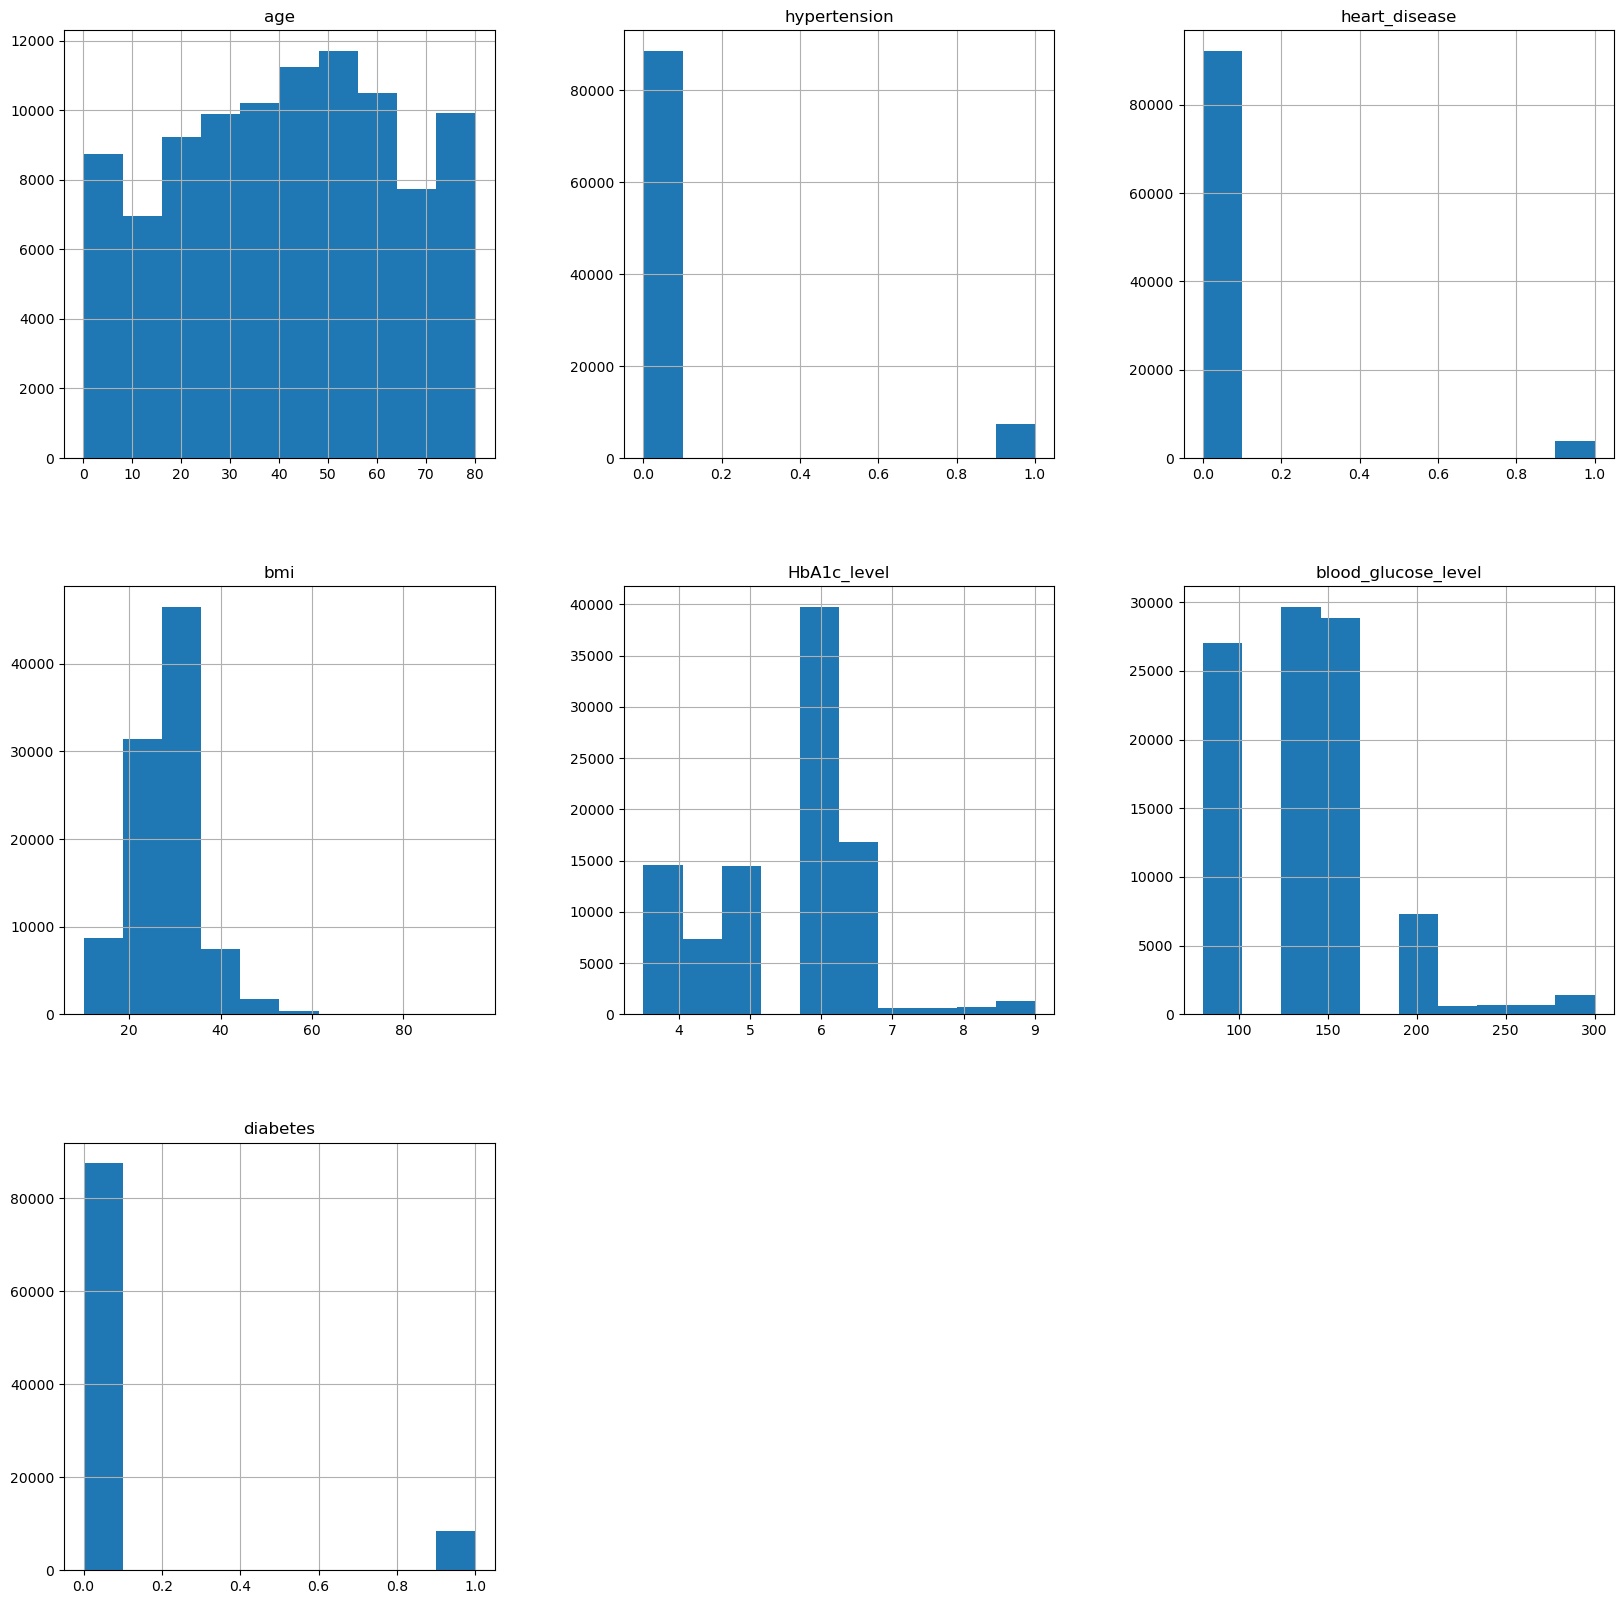

In [53]:
dataset.hist(figsize=(20, 20))

In [54]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'


# Apply the function to the 'smoking_history' column
dataset['smoking_history'] = dataset['smoking_history'].apply(recategorize_smoking)
# Check the new value counts
print(dataset['smoking_history'])

0         non-smoker
1         non-smoker
2         non-smoker
3            current
4            current
            ...     
99994     non-smoker
99996     non-smoker
99997    past_smoker
99998     non-smoker
99999        current
Name: smoking_history, Length: 96128, dtype: object


0    87646
1     8482
Name: diabetes, dtype: int64


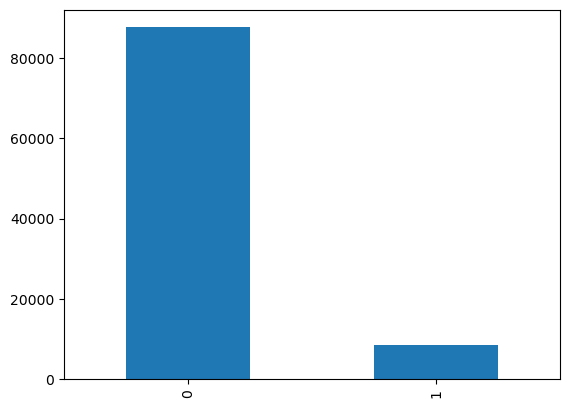

In [55]:
# Data Imbalanced
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = dataset["diabetes"].map(lambda x: color_wheel.get(x + 1))
print(dataset.diabetes.value_counts())
p=dataset.diabetes.value_counts().plot(kind="bar")

# Labeling gender and smoking_history columns to numeric

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

list_str = ['gender', 'smoking_history']
for c in list_str:
    dataset[c] = le.fit_transform(dataset[c])

dataset.head(50)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,1,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,1,27.32,5.7,158,0
3,0,36.0,0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,0,20.14,4.8,155,0
5,0,20.0,0,0,1,27.32,6.6,85,0
6,0,44.0,0,0,1,19.31,6.5,200,1
7,0,79.0,0,0,1,23.86,5.7,85,0
8,1,42.0,0,0,1,33.64,4.8,145,0
9,0,32.0,0,0,1,27.32,5.0,100,0


# Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
Scaled_Dataset =  pd.DataFrame(sc_X.fit_transform(dataset.drop(["diabetes"], axis=1)), columns=['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'])
Scaled_Dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,-0.843594,1.700709,-0.290080,4.848061,-0.202615,-0.314941,0.994547,0.043558
1,-0.843594,0.543261,-0.290080,-0.206268,-0.202615,-0.000214,0.994547,-1.423041
2,1.185405,-0.614187,-0.290080,-0.206268,-0.202615,-0.000214,0.155949,0.483538
3,-0.843594,-0.258049,-0.290080,-0.206268,-2.065017,-0.572042,-0.496294,0.410208
4,1.185405,1.522640,3.447327,4.848061,-2.065017,-1.061124,-0.682649,0.410208


In [58]:
Scaled_Dataset.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
96123,-0.843594,-0.258049,-0.29008,-0.206268,-0.202615,-0.402119,-0.682649,0.165775
96124,-0.843594,-1.771635,-0.29008,-0.206268,-0.202615,-1.470417,0.901370,-0.934175
96125,1.185405,1.077468,-0.29008,-0.206268,1.659787,0.075143,0.155949,0.410208
96126,-0.843594,-0.792256,-0.29008,-0.206268,-0.202615,1.196634,-1.428070,-0.934175
96127,-0.843594,0.676812,-0.29008,-0.206268,-2.065017,-0.722756,0.994547,-1.178608


# Spliting Dataset into Training and Testing set

In [59]:
X = dataset.drop(['diabetes'], axis=1)
y = dataset['diabetes']

In [93]:
# Removing imbalanced in dataset
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler()
X_ros, y_ros = ros.fit_resample(X, y)
print(X_ros.shape, y_ros.shape)

(16964, 8) (16964,)


In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros, test_size=0.20, random_state=1)

# Applying Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

C:\Users\Ritesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
from sklearn import metrics

predictions = log_reg_model.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.8859416445623343


In [97]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[1463  199]
 [ 188 1543]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1662
           1       0.89      0.89      0.89      1731

    accuracy                           0.89      3393
   macro avg       0.89      0.89      0.89      3393
weighted avg       0.89      0.89      0.89      3393



# Applying Random Forest Algorithm

In [98]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [99]:
predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.9074565281461833


In [100]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[1477  185]
 [ 129 1602]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1662
           1       0.90      0.93      0.91      1731

    accuracy                           0.91      3393
   macro avg       0.91      0.91      0.91      3393
weighted avg       0.91      0.91      0.91      3393



# Applying Decision Tree Algorithm

In [101]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [102]:
predictions1 = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions1)))

Accuracy Score = 0.8800471559092249


In [103]:
print(confusion_matrix(y_test, predictions1))
print(classification_report(y_test,predictions1))

[[1450  212]
 [ 195 1536]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1662
           1       0.88      0.89      0.88      1731

    accuracy                           0.88      3393
   macro avg       0.88      0.88      0.88      3393
weighted avg       0.88      0.88      0.88      3393



# It is clear from the result that Random Forest gives the best Accuracy
# Saving the Random Forest Algorithm

In [117]:
import joblib
joblib.dump(rfc, "Model.h5")

['Model.h5']

In [119]:
model = joblib.load("Model.h5")
ip = pd.DataFrame(np.array( [1, 67.0, 0, 1, 2, 27.32, 6.5, 200]).reshape(1,-1), columns=['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'])
ip2 = pd.DataFrame(np.array( [0, 80.0, 0, 1, 1, 25.19, 6.6, 140]).reshape(1,-1), columns=['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'])

print(model.predict(ip))
print(model.predict(ip2))

[1]
[0]
